In [1]:
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
import os

In [11]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz


--2024-10-13 20:32:33--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  74.8MB/s    in 2.9s    

2024-10-13 20:32:36 (74.8 MB/s) - ‘flower_photos.tgz’ saved [228813984/228813984]



In [2]:
import pathlib

In [12]:
!tar -xvzf flower_photos.tgz

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [13]:
data_dir=pathlib.Path('/content/flower_photos')

In [14]:
data_dir

PosixPath('/content/flower_photos')

In [16]:
rose=list(data_dir.glob('roses/*'))

In [17]:
rose[0]

PosixPath('/content/flower_photos/roses/5777669976_a205f61e5b.jpg')

In [18]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'tulips':list(data_dir.glob('tulips/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
}


In [19]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'tulips':2,
    'dandelion':3,
    'sunflowers':4,
}

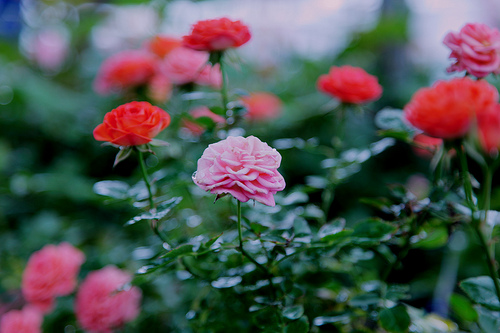

In [20]:
PIL.Image.open(flowers_images_dict['roses'][0])

In [21]:
ko=cv2.imread(str(flowers_images_dict['roses'][0]))

In [22]:
ko.shape

(333, 500, 3)

In [23]:
cv2.resize(ko,(180,180)).shape

(180, 180, 3)

In [24]:
import cv2
import numpy as np

X = []
y = []

for flower_name, flower_image in flowers_images_dict.items():
    for image in flower_image:
        try:
            img = cv2.imread(str(image))
            # Check if image was loaded successfully
            if img is not None:
                img2 = cv2.resize(img, (180, 180))
                X.append(img2)
                y.append(flowers_labels_dict[flower_name])
            else:
                print(f"Failed to load image: {image}")
        except Exception as e:
            print(f"Error processing image {image}: {e}")

# Convert X and y to NumPy arrays outside the loop
X = np.array(X)
y = np.array(y)

In [25]:
X.shape

(3670, 180, 180, 3)

In [27]:
model=keras.Sequential([
    keras.layers.Conv2D(16,3,input_shape=(180,180,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='softmax')
])
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [30]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [31]:
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.3017 - loss: 1.6488
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4891 - loss: 1.2027
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5347 - loss: 1.1163
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5977 - loss: 1.0287
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6348 - loss: 0.9129
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6595 - loss: 0.8712
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6686 - loss: 0.8224
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7376 - loss: 0.6577
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7702 - loss: 0.5727
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7999 - loss: 0.5162


In [32]:
model.evaluate(X_test_scaled,y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6347 - loss: 1.0275


[1.0329642295837402, 0.6448683142662048]

In [33]:
yp=model.predict(X_test_scaled)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [34]:
y_pred=[np.argmax(element) for element in yp]

In [35]:
y_pred[:5]

[2, 0, 2, 4, 0]

In [36]:
y_test[:5]

array([2, 0, 2, 2, 0])

As we can see the testing accuracy is nearly 63% now we have to avoid over fitting of model by adding augmentation layers .

In [39]:
data_augmentation= keras.Sequential([
    keras.layers.RandomFlip('horizontal',input_shape=(180,180,3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(-0.5, 179.5, 179.5, -0.5)

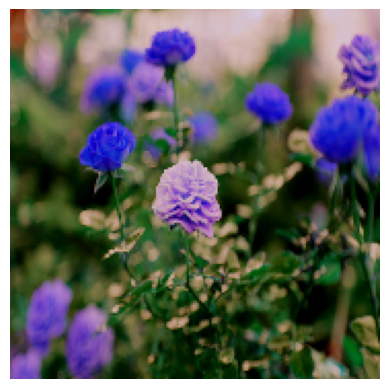

In [41]:
plt.imshow(X[0])
plt.axis("off")

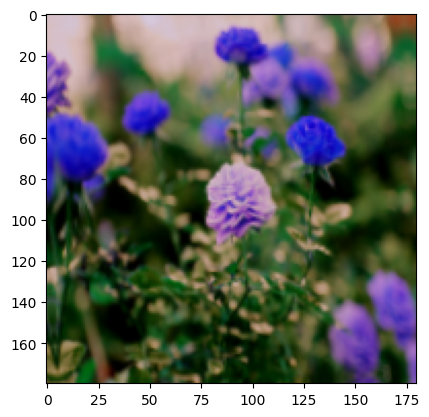

In [44]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [45]:
model_new=keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,input_shape=(180,180,3),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='softmax')
])
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model_new.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [48]:
model_new.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6582 - loss: 0.8628
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6697 - loss: 0.8573
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6563 - loss: 0.8913
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6944 - loss: 0.8157
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7003 - loss: 0.7952
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6935 - loss: 0.7932
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7048 - loss: 0.7658
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6750 - loss: 0.8011
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7241 - loss: 0.7114
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7019 - loss: 0.7570
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7410 - loss: 0.7114
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy:

In [49]:
model_new.evaluate(X_test_scaled,y_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7122 - loss: 0.7290


[0.7355452179908752, 0.7211625576019287]

In [50]:
ypn=model_new.predict(X_test_scaled)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [51]:
y_predn=[np.argmax(i) for i in ypn]

In [52]:
y_test[:5]

array([2, 0, 2, 2, 0])

In [53]:
y_predn[:5]

[2, 0, 2, 4, 0]

In [54]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test,y_predn))

              precision    recall  f1-score   support

           0       0.64      0.49      0.55       183
           1       0.72      0.72      0.72       179
           2       0.62      0.78      0.70       249
           3       0.83      0.71      0.77       270
           4       0.79      0.86      0.82       220

    accuracy                           0.72      1101
   macro avg       0.72      0.71      0.71      1101
weighted avg       0.73      0.72      0.72      1101

